<h1 align="center">USA Residential House Price Affecting Factors</h1> 

# <h3>About Data</h3>

We are going to use the USA_Housing dataset. Since house price(target) is a continues variable, this is a regression problem. This dataset contains 7 features(columns) which are as follows:

 1. 'Avg. Area Income':  Avg. Income of residents of the city where the house is located.
 2. 'Avg. Area House Age': Avg Age of Houses in city
 3. 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses 
 4. 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses 
 5. 'Area Population': Population of city where the house is located
 6. 'Price': Price(how much the house was sold for)
 7. 'Address': Address for the house

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [2]:
#reading data
df = pd.read_csv("housing_data.csv")

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [4]:
df.shape

(5000, 7)

Data has 5000 records and 7 columns.

In [5]:
#Let's check the column names
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


six variables are float and one is object

In [7]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Data has no null values

In [8]:
# Extracting "State" form "Address" column
df['State'] = df['Address'].apply(lambda x: x.split(' ')[-2])

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...",NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ...",CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064...",WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386,AE


In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


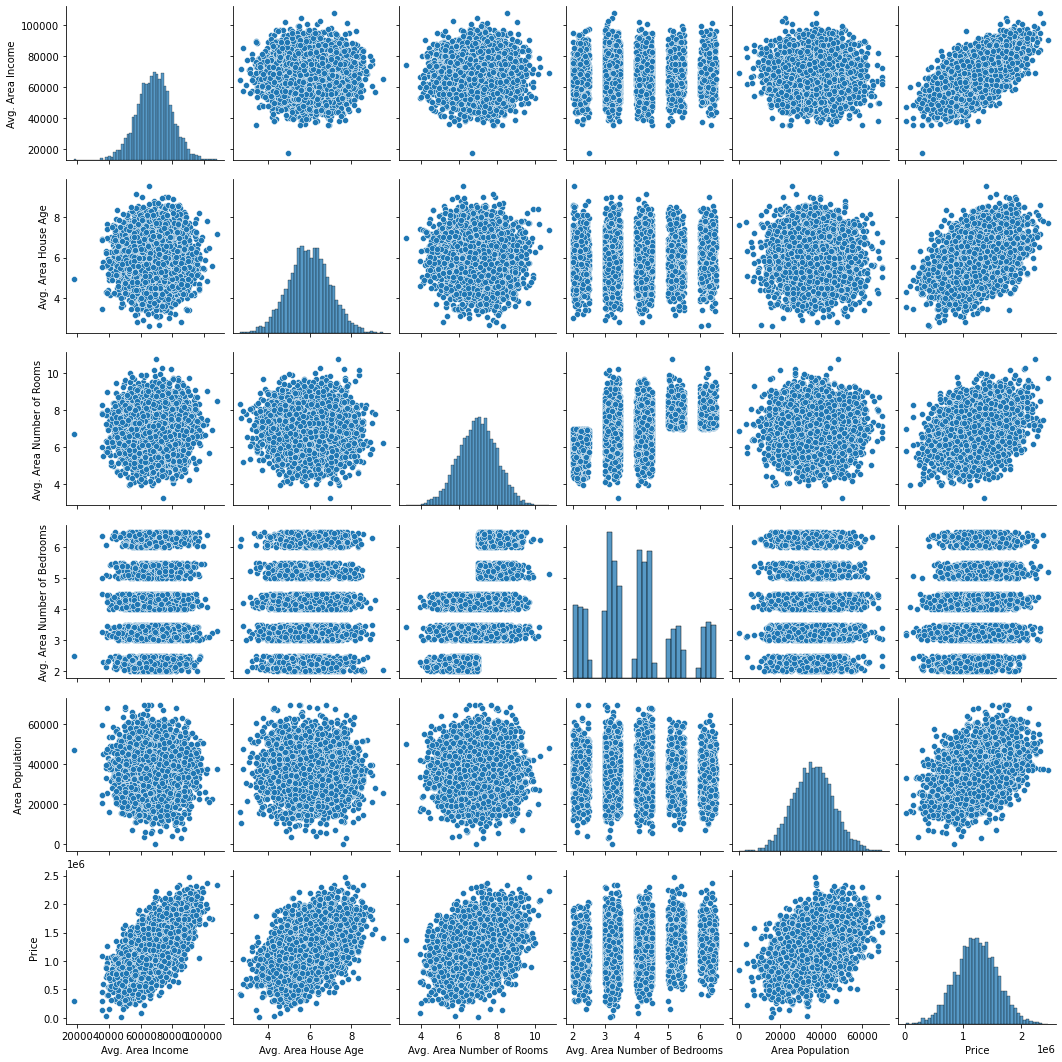

In [11]:
#Let's visualize the data into a pairplot
#plt.figure(figsize =(20,10))
sns.pairplot(data= df)

<AxesSubplot:>

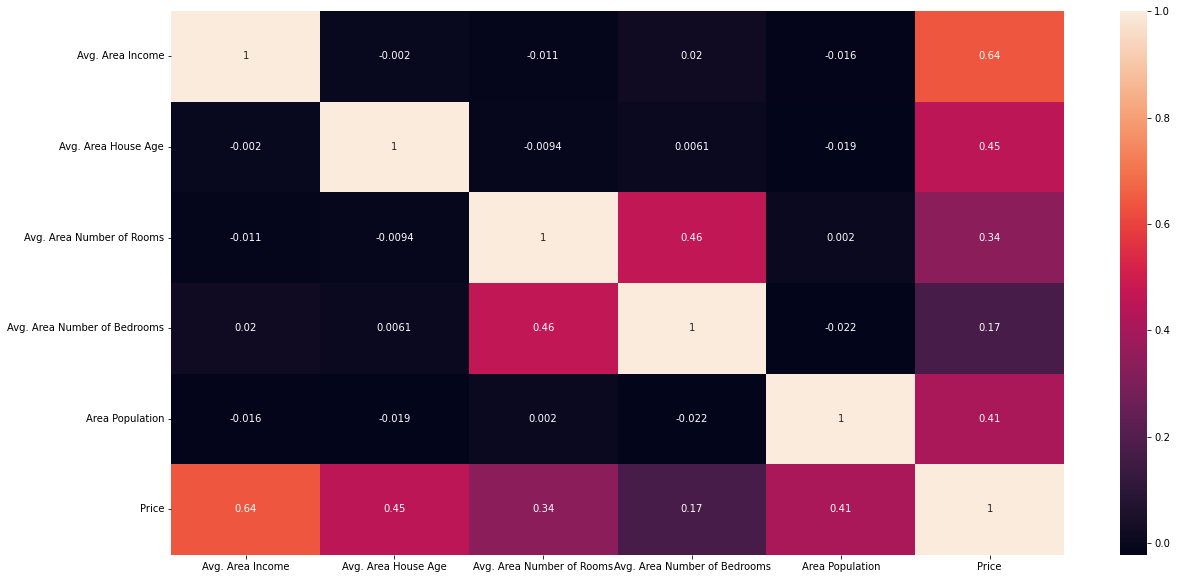

In [12]:
#let's visualize the correlation through a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

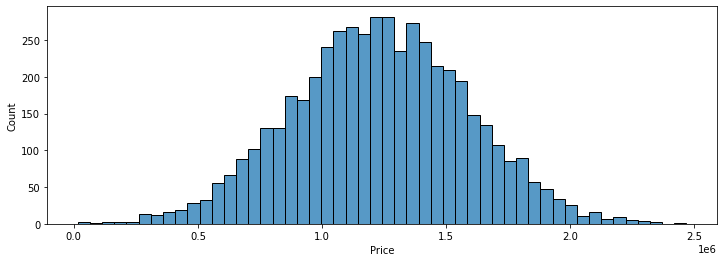

In [13]:
#let plot a histogram to better undrestand the data
plt.figure(figsize = (12,4))
sns.histplot(df["Price"], bins = 50)

# Let's visualize the correlation of continuous variable with the target

### 1.   ' Avg. Area Income' and 'Price'

(0.0, 2591721.9409872736)

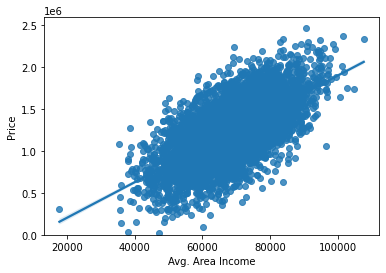

In [14]:
sns.regplot(x = 'Avg. Area Income', y = 'Price', data = df)
plt.ylim(0,)

In [15]:
#Let's calculate the Pearson Correlation Coefficient and p-value of 'Avg. Area Income' and 'Price'

from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Avg. Area Income'], df['Price'])
print("Pearson Correlation Coefficient: ", pearson_coef, "p-value: ", p_value)

Pearson Correlation Coefficient:  0.639733778249894 p-value:  0.0


This shows that correlation between 'Avg. Area Income' and 'Price' is statistically significant and they have a strong positive linear relationship. This means with increase in 'Avg. Area Income', 'Price' also increases.

### 2. 'Avg. Area House Age' and 'Price'

(0.0, 2591721.9409872736)

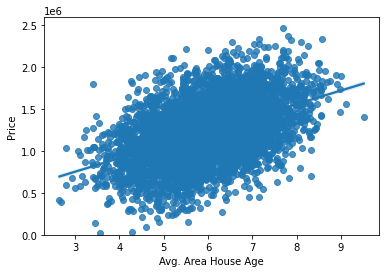

In [16]:
sns.regplot(x = 'Avg. Area House Age', y = 'Price', data = df)
plt.ylim(0,)

In [17]:
#Let's calculate the Pearson Correlation Coefficient and p-value of 'Area Population' and 'Price'

pearson_coef, p_value = stats.pearsonr(df['Avg. Area House Age'], df['Price'])
print("Pearson Correlation Coefficient: ", pearson_coef, "p-value: ", p_value)

Pearson Correlation Coefficient:  0.4525425371787558 p-value:  4.944750033819791e-251


This shows that correlation between 'Avg. Area House Age' and 'Price' is statistically significant(as p value is less than 0.001) and they have a relatively strong positive linear relationship.

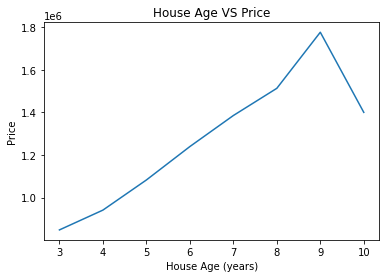

In [18]:
#Let's visualize 'Avg. Area House Age' and 'Price' with a line graph to understand it more.
df.groupby(round(df['Avg. Area House Age']))['Price'].mean().plot()
plt.title('House Age VS Price')
plt.xlabel('House Age (years)')
plt.ylabel('Price')
plt.show()

This shows that the price increases with the age of the house, but the price goes down as the age of the house exceeds 9 years.

### 3. 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms' and 'Price'

(0.0, 2591721.9409872736)

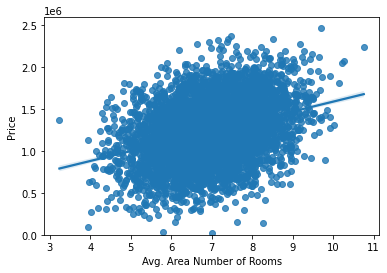

In [19]:
sns.regplot(x = 'Avg. Area Number of Rooms', y = 'Price', data = df)
plt.ylim(0,)

In [20]:
#Let's calculate the Pearson Correlation Coefficient and p-value of 'Avg. Area Number of Rooms' and 'Price'

pearson_coef, p_value = stats.pearsonr(df['Avg. Area Number of Rooms'], df['Price'])
print("Pearson Correlation Coefficient: ", pearson_coef, "p-value: ", p_value)

Pearson Correlation Coefficient:  0.33566445336675965 p-value:  6.165892555749277e-132


This shows that correlation between 'Avg. Area Number of Rooms' and 'Price' is statistically significant(as p value is less than 0.001) and they have a moderate positive linear relationship. This means with the increase in Number of Rooms, price increases moderately. 

C:\Users\97156\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


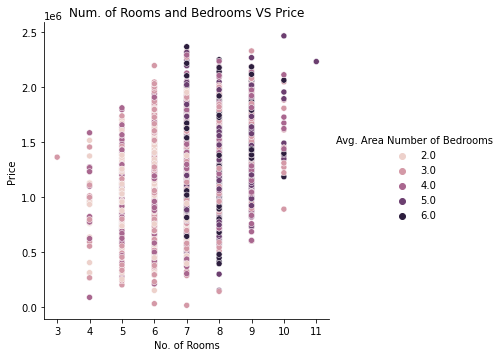

In [21]:
sns.relplot(round(df['Avg. Area Number of Rooms']), round(df['Price']), hue=round(df['Avg. Area Number of Bedrooms']))
plt.title('Num. of Rooms and Bedrooms VS Price')
plt.xlabel('No. of Rooms')
plt.ylabel('Price')
plt.show()

### 4. 'Area Population' and 'Price'

(0.0, 2591721.9409872736)

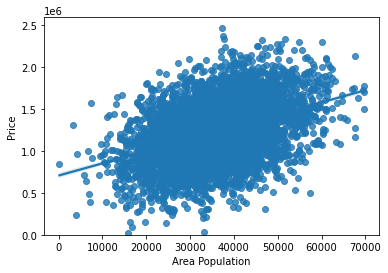

In [22]:
sns.regplot(x = 'Area Population', y = 'Price', data = df)
plt.ylim(0,)

In [23]:
#Let's calculate the Pearson Correlation Coefficient and p-value of 'Area Population' and 'Price'

pearson_coef, p_value = stats.pearsonr(df['Area Population'], df['Price'])
print("Pearson Correlation Coefficient: ", pearson_coef, "p-value: ", p_value)

Pearson Correlation Coefficient:  0.40855587931655624 p-value:  1.736392053838134e-200


This shows that correlation between 'Area Population' and 'Price' is statistically significant(as p value is less than 0.001) and they have a relatively strong positive linear relationship.

### 5. 'State' and 'Price'

In [24]:
df.groupby('State')['Price'].mean().sort_values(ascending=False)

State
AK    1.337328e+06
TX    1.336076e+06
UT    1.308736e+06
CO    1.299452e+06
SD    1.272387e+06
          ...     
MN    1.177435e+06
ME    1.167912e+06
AR    1.157449e+06
GA    1.152296e+06
HI    1.145655e+06
Name: Price, Length: 62, dtype: float64

<AxesSubplot:xlabel='State'>

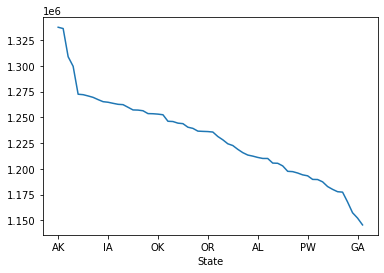

In [25]:
df.groupby('State')['Price'].mean().sort_values(ascending=False).plot()

<AxesSubplot:>

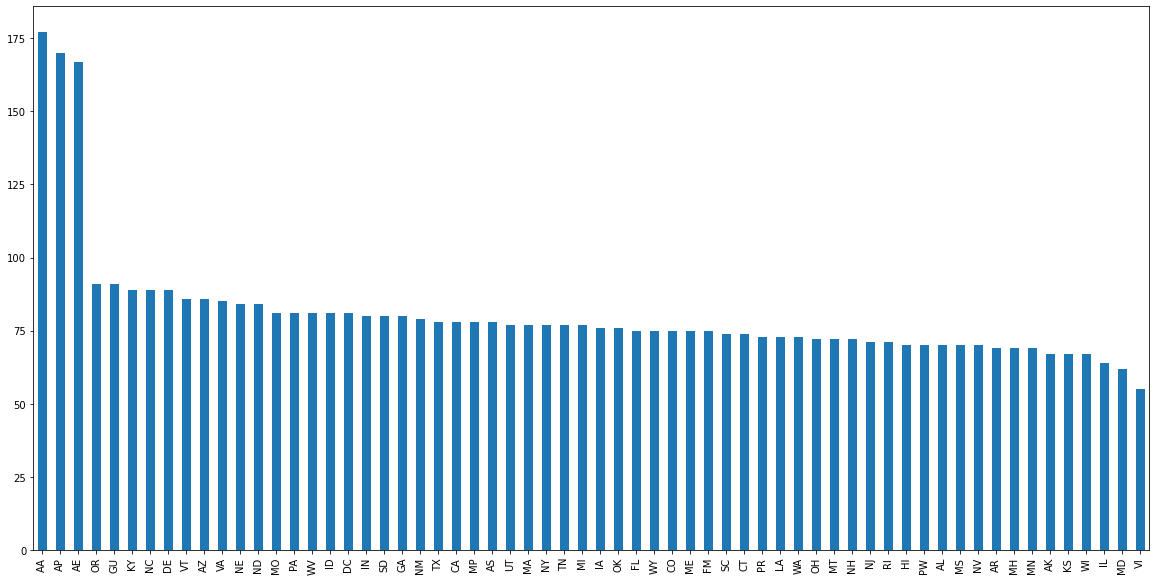

In [26]:
plt.figure(figsize=(20,10))
df['State'].value_counts().sort_values(ascending=False).plot(kind = 'bar')

This shows State affects the Price but mostly for the 3 states that are 'AA', 'AP' and 'AE', where 'AA' has the most expensive houses, then 'AP' and then 'AE', and after 'AE' Price goes down considerably slowly.

# Conclusion

After analysing the dataset, we can conclude that residential house prices across the United States were most affected by the following factors
 1. Area Income
 2. Age of the House
 3. Area Population 

Some other factors that affect the house price are state, number of rooms and bedrooms.

There could also be some other factors that might influence the price of residential houses in US, which are not present in the dataset, they are- 
1. Total square feet of the house
2. Orientation of the house
3. Number of bathrooms
4. Proximities like Shopping mall, schools, park etc from the house
5. Central business district
6. Availability of public transport from the house.
7. Distance to the airport.